In [ ]:
import pandas as pd
import numpy as np
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
# Generate random data for 6 columns
data = {
    'Glucose': np.random.randint(0, 200, size=500),
    'BloodPressure': np.random.randint(0, 122, size=500),
    'SkinThickness': np.random.randint(0, 99, size=500),
    'BMI': np.random.uniform(0, 67, size=500),
    'Age': np.random.randint(21, 81, size=500),
    'Outcome': np.random.randint(0, 2, size=500) # 0 or 1 for diabetes
}

# Create a Pandas DataFrame
df = pd.DataFrame(data)

# Print the first 5 rows
df.shape

(500, 6)

In [ ]:
x = df.iloc[:,:-1]
y = df['Outcome']

In [ ]:
lr = LogisticRegression()
sfs = SequentialFeatureSelector(lr,k_features=2,forward=True)
sfs.fit(x,y)

SequentialFeatureSelector(estimator=LogisticRegression(), k_features=(2, 2),
                          scoring='accuracy')

In [ ]:
sfs.k_feature_names_

('SkinThickness', 'BMI')

In [ ]:
sfs.k_score_

np.float64(0.5780000000000001)

In [ ]:
# 5 - np.float64(0.524)
# 4 - np.float64(0.532)
# 3 - np.float64(0.532)
# 2 - np.float64(0.55)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Set a seed for reproducibility
np.random.seed(42)

# Number of data points
n_samples = 500

# Create a DataFrame with 10 columns
data = {
    'CRIM': np.random.rand(n_samples) * 10,  # Per capita crime rate
    'ZN': np.random.randint(0, 100, size=n_samples),  # Proportion of residential land zoned for lots over 25,000 sq.ft.
    'INDUS': np.random.rand(n_samples) * 27.74,  # Proportion of non-retail business acres per town
    'CHAS': np.random.randint(0, 2, size=n_samples),  # Charles River dummy variable
    'NOX': np.random.rand(n_samples) * 0.871,  # Nitric oxides concentration
    'RM': np.random.uniform(3, 9, size=n_samples),  # Average number of rooms per dwelling
    'AGE': np.random.randint(2, 100, size=n_samples),  # Proportion of owner-occupied units built prior to 1940
    'DIS': np.random.rand(n_samples) * 12,  # Weighted distances to five Boston employment centers
    'RAD': np.random.randint(1, 25, size=n_samples),  # Index of accessibility to radial highways
    'PRICE': np.random.randint(5, 50, size=n_samples) # Housing price
}

df = pd.DataFrame(data)
df.shape


(500, 10)

In [ ]:
x = df.iloc[:,:-1]
y = df['PRICE']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
x_test.shape,y_test.shape

((100, 9), (100,))

In [ ]:
x_train.shape,y_train.shape

((400, 9), (400,))

0.895544543147505
Coefficients: [2.04655458]
Intercept: 2.6444733729267433


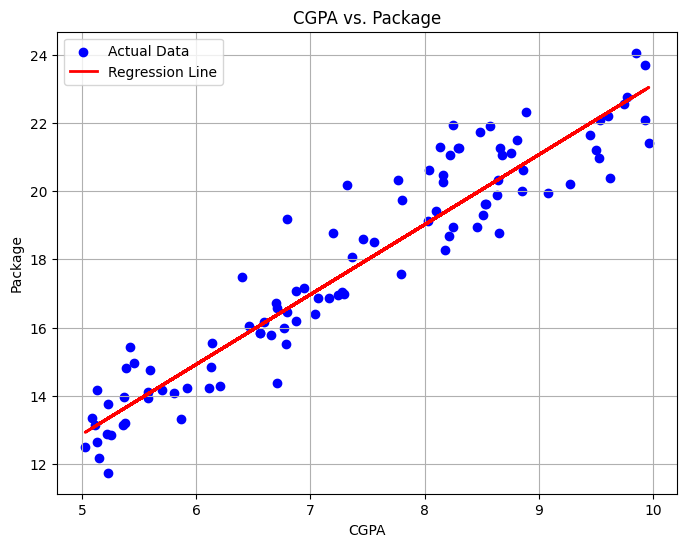

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Set a seed for reproducibility
np.random.seed(42)

# Number of data points
n_samples = 500

# Generate data with a more realistic relationship between CGPA and package
cgpa = np.random.uniform(5, 10, n_samples)  # CGPA between 5 and 10
noise = np.random.normal(0, 1, n_samples)  # Add some noise to the relationship
package = 3 + 2 * cgpa + noise  # Package increases with CGPA, plus noise


# Create a DataFrame
df = pd.DataFrame({'CGPA': cgpa, 'Package': package})

# Split data into training and testing sets
X = df[['CGPA']]
y = df['Package']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
score = model.score(X_test,y_test)
print(score)
# Evaluate the model
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")

# Plot the data and the regression line
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel("CGPA")
plt.ylabel("Package")
plt.title("CGPA vs. Package")
plt.legend()
plt.grid(True)
plt.show()
